# Vintage Analysis
Data Source : https://www.kaggle.com/rikdifos/credit-card-approval-prediction

# 1. Load Packages

In [1]:
# Change Directory
%cd D:\Dito\Pekerjaan\Self Project\1. Credit Card Scoring\Dataset

# Packages
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

D:\Dito\Pekerjaan\Self Project\1. Credit Card Scoring\Dataset


# 2. Load Dataset

In [2]:
credit = pd.read_csv('credit_record.csv')
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [3]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


# 3. Transform & Result

In [4]:
# binning the status. Define status 3, 4, 5 to bad credit.
credit['STATUS_BIN'] = 0
credit.loc[credit['STATUS'].isin(['3','4','5']),'STATUS_BIN'] = 1
credit['row_num'] = credit.sort_values('MONTHS_BALANCE').groupby(['ID']).cumcount()+1
credit['row_num'] = credit['row_num'] - 1
credit = credit.sort_values(['ID','row_num']).reset_index(drop=True)
credit['NEW_STATUS'] = credit.groupby('ID').STATUS_BIN.cummax()
credit

,ID,MONTHS_BALANCE,STATUS,STATUS_BIN,row_num,NEW_STATUS
0,5001711,-3,0,0,0,0
1,5001711,-2,0,0,1,0
2,5001711,-1,0,0,2,0
3,5001711,0,X,0,3,0
4,5001712,-18,0,0,0,0
...,...,...,...,...,...,...
1048570,5150487,-4,C,0,25,0
1048571,5150487,-3,C,0,26,0
1048572,5150487,-2,C,0,27,0
1048573,5150487,-1,C,0,28,0


In [5]:
temp = credit.groupby('ID').agg({'row_num':'max'}).reset_index()
temp.columns = ['ID','START_MONTH']

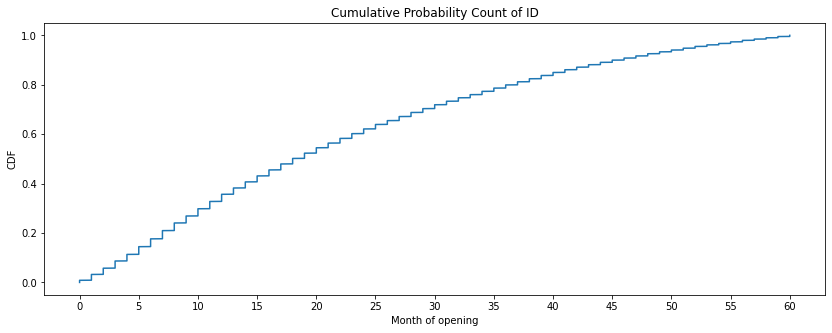

In [6]:
# Percentage of default user based on months of register

plt.rcParams["figure.figsize"] = (14, 5)
ecdf0 = ECDF(temp['START_MONTH'])
plt.plot(ecdf0.x, ecdf0.y)


plt.xlabel('Month of opening')
# Set the y axis label of the current axis.
plt.ylabel('CDF')
# Set a title of the current axes.
plt.title('Cumulative Probability Count of ID')
# show a legend on the plot
#plt.legend()
# plt.xlim([0, 0.7])
#plt.ylim([0, 60])
# Display a figure.
plt.xticks([0,5,10,15,20,25,30,35,40,45,50,55,60])
plt.show()

In [7]:
temp1_sum = credit.pivot(index='ID', columns='row_num', values='NEW_STATUS').reset_index()
temp1 = credit.pivot(index='ID', columns='row_num', values='STATUS_BIN').reset_index()
temp1_sum

row_num,ID,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,5001711,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5001712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5001713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5001714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5001715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45980,5150482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45981,5150483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45982,5150484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45983,5150485,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
vintage_sum = temp1_sum.merge(temp,on='ID',how='left')
vintage = temp1.merge(temp,on='ID',how='left')
vintage_sum

,ID,0,1,2,3,4,5,6,7,8,...,52,53,54,55,56,57,58,59,60,START_MONTH
0,5001711,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,5001712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
2,5001713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21
3,5001714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
4,5001715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45980,5150482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
45981,5150483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
45982,5150484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
45983,5150485,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [9]:
vintage.drop(['ID'],axis=1,inplace=True)
vintage_sum.drop(['ID'],axis=1,inplace=True)

In [10]:
temp = vintage.groupby('START_MONTH').mean()*100
temp_sum = vintage_sum.groupby('START_MONTH').mean()*100

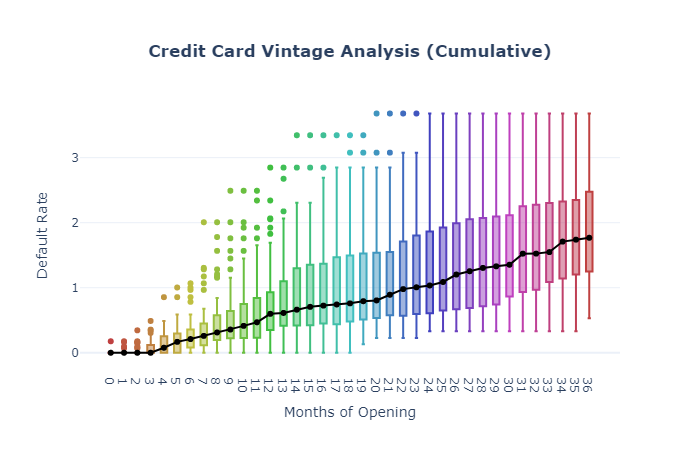

In [14]:
# Plot Preparation
N = 37     
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]

# Plot
fig = go.Figure()

for col in temp.columns[:N]:
  fig.add_trace(go.Box(y=temp_sum[col].values, name=col,marker_color=c[col]))

fig.add_trace(go.Scatter(x=temp_sum.columns.to_list()[:N], y=temp_sum.median()[:N],marker_color='black', mode='lines+markers'))
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = temp.columns.to_list()[:N],
        ticktext = temp.columns.to_list()[:N]
    ),
    showlegend=False
)
fig.update_layout(
    title={
        'text': "<b>Credit Card Vintage Analysis (Cumulative)<b>",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    template='plotly_white')
fig.update_xaxes(title_text='Months of Opening')
fig.update_yaxes(title_text='Default Rate')
fig.show('png')

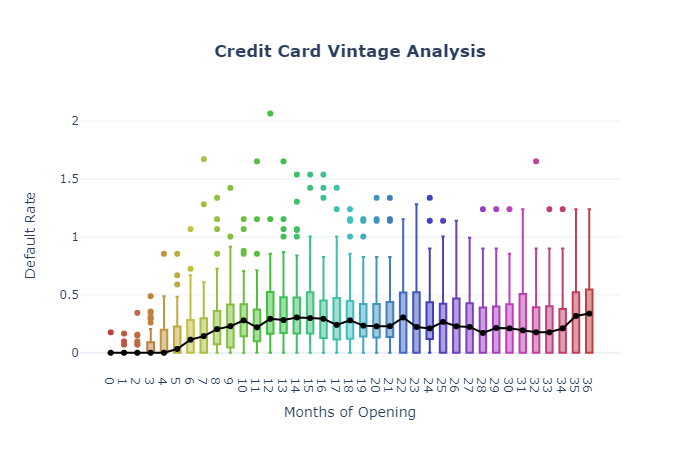

In [12]:
# Plot Preparation

N = 37 

c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]

# Plot
fig = go.Figure()

for col in temp.columns[:N]:
  fig.add_trace(go.Box(y=temp[col].values, name=col,marker_color=c[col]))

fig.add_trace(go.Scatter(x=temp.columns.to_list()[:N], y=temp.median()[:N],marker_color='black', mode='lines+markers'))
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = temp.columns.to_list()[:N],
        ticktext = temp.columns.to_list()[:N]
    ),
    showlegend=False
)
fig.update_layout(
    title={
        'text': "<b>Credit Card Vintage Analysis<b>",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    template='plotly_white')
fig.update_xaxes(title_text='Months of Opening')
fig.update_yaxes(title_text='Default Rate')
fig.show('png')